In [1]:
import numpy as np
import pandas as pd
#import time dependencies
from datetime import datetime
import time
from datetime import date, timedelta
import datetime
#import statistics dependencies
from scipy.stats import linregress
from scipy import stats
#import matplotlib dependencies
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.lines as mlines
import matplotlib.ticker as mticker
import matplotlib.ticker as mtick
import matplotlib as mpl

from scipy.stats import chi2
import collections
from matplotlib import colors
import random
import seaborn as sns
from scipy import stats
import statistics as st

In [2]:
#the data in this script is Discrete Data
#-Data can be counted but cannot be divided.
#-Data can be categorized into bins 
#probability mass function-assigns a probability to each possible value
#https://towardsdatascience.com/plotting-probabilities-for-discrete-and-continuous-random-variables-353c5bb62336

# Winning Numbers

In [3]:
#create a data set that contains all the winning numbers
data=[
[6,13,34,46,62],
[18,34,44,60,69],
[46,54,57,58,66],
[27,32,50,52,57],
[11,44,45,46,70],
[5,11,25,27, 64],   
[15,16,18,39,59],
[9,38,47,49,68],
[14,39,43,44,67],
[20,36,37,48,67],
[26,29,41,52,64],
[25,28,38,59,62],
[3,15,42,48,56],
[7,10,15,31,57],
[19,22,24,28,53],
[15,25,26,38,47],
[3,9,50,53,64],
[8,10,15,17,57],
[11,15,31,42,63],
[4,18,26,27,58],
[3,24,29,42,47],
[8,22,29,43,56],
[4,44,53,64,70],
[2,22,30,42,62],
[12,35,46,48,69],
[17,20,27,31,34],
[8,33,39,54,58],
[14,25,26,41,43],
[12,13,21,46,57],
[6,26,55,56,64],
[10,15,20,49,53],
[16,20,25,30,43],
[20,40,44,45,50],
[9,16,29,37,53],
[6,20,37,40,48],
[11,34,36,52,66],
[21,23,33,35,42],
[9,14,57,67,70],
[1,5,9,10,23],
[32,35,37,47,55],
[9,20,23,26,29],
[10,13,32,41,51],
[34,52,58,59,62],
[8,10,20,44,46],
[8,19,25,36,66],
[11,17,32,33,46],
[7,16,27,44,52],
[5,20,22,61,70],
[7,13,17,21,45],
[28,30,31,35,66],
[13,19,53,54,63],
[1,27,32,60,67],
     ]

In [55]:
#need to concatonate all the lists of numbers 
#list=list+x is the same as list+=x
#create an empty list and then loop through a sample of 30
# sample of 30 is enough for the central limit theorem(large data set normalizes the numbers) 
#could use ''.join()
lst=[]
for x in data[0:30]:
    lst+=x
#count the number of times a # occurs in lst
#then sort them
d={}
[ d.update( {i:d.get(i, 0)+1} ) for i in lst ]
sorted_d = sorted(d.items())

###find the numbers that have not been called in the data set
#sort the list, and then look through a range from index 0 to 71
#Then if not in list return those numbers
lst.sort()
def find_missing(lst): 
    return [x for x in range(lst[0], lst[-1]+1)  if x not in lst]

print("Numbers have not been choosen")
print(find_missing(lst))

###Finding numbers that are repeated exactly twice 
##there is an initial assumption that numbers repeated only twice are more likely to be called again than any other repetition
once=[
    item
    for item,  count in collections.Counter(lst).items()
    if count == 1]
repeats = [
    item 
    for item, count in collections.Counter(lst).items() 
    if count == 2]

print("Numbers that have been choosen only once")
print(once)
print("Numbers that have been choosen only twice")
print(repeats)

lucky_Numbers=once+repeats+find_missing(lst)
lucky_Numbers.sort()
print('Lucky Numbers')
# Lucky Numbers are the numbers that have never been chose, chosen once, or chosen twice.
lucky_Numbers

Numbers have not been choosen
[23, 40, 51, 61, 65]
Numbers that have been choosen only once
[2, 5, 7, 16, 19, 21, 30, 32, 33, 35, 36, 37, 45, 49, 55, 60, 63, 66, 68]
Numbers that have been choosen only twice
[4, 6, 9, 10, 12, 13, 14, 17, 20, 24, 28, 41, 50, 52, 54, 59, 67, 69, 70]
Lucky Numbers


[2,
 4,
 5,
 6,
 7,
 9,
 10,
 12,
 13,
 14,
 16,
 17,
 19,
 20,
 21,
 23,
 24,
 28,
 30,
 32,
 33,
 35,
 36,
 37,
 40,
 41,
 45,
 49,
 50,
 51,
 52,
 54,
 55,
 59,
 60,
 61,
 63,
 65,
 66,
 67,
 68,
 69,
 70]

## Statisitics

In [5]:
stdev = st.pstdev(lst)
print('Standard Deviation')
print(stdev)
variance = st.pvariance(lst)
print('Variance')
print(variance)

Standard Deviation
19.164114612704886
Variance
367.2632888888889


## Comparing Lists With and Without Numbers From 60 to 70

In [6]:
# Numbers from 60 to 70 are uncommon 
# The following section analyzes the difference between lists with the numbers from 60 to 70 and lists without the numbers 60 to 70
lst_sixty=lst[0:59]
print('Mean')
print(st.mean(lst_sixty))
print('Median')
print(st.median(lst_sixty))
print('Variance')
print(st.variance(lst_sixty))
print('Standard Deviation')
print(st.stdev(lst_sixty))

Mean
15.508474576271187
Median
15
Variance
58.32320280537697
Standard Deviation
7.636962930732149


In [7]:
lst
print('Mean')
print(st.mean(lst))
print('Median')
print(st.median(lst))
print('Variance')
print(st.variance(lst))
print('Standard Deviation')
print(st.stdev(lst))

Mean
35.49333333333333
Median
35.5
Variance
369.7281431767338
Standard Deviation
19.22831618152598


In [8]:
#null hyp: removing the numbers 60 to 70 will not effect the study (if p-value is below 0.05 then we can reject the null hypothesis)
#alt hyp: removing the numbers 60 to 70 will have a positive effect on the study
stats.ttest_ind(lst, lst_sixty, equal_var = False)

Ttest_indResult(statistic=10.754214647546263, pvalue=1.0281461013821672e-21)

## Visualizing Winning Numbers

In [9]:
#example of how to calculate probablility
probabilitiz=[]
for x in lst:
    probabilitiz.append(x/len(lst))

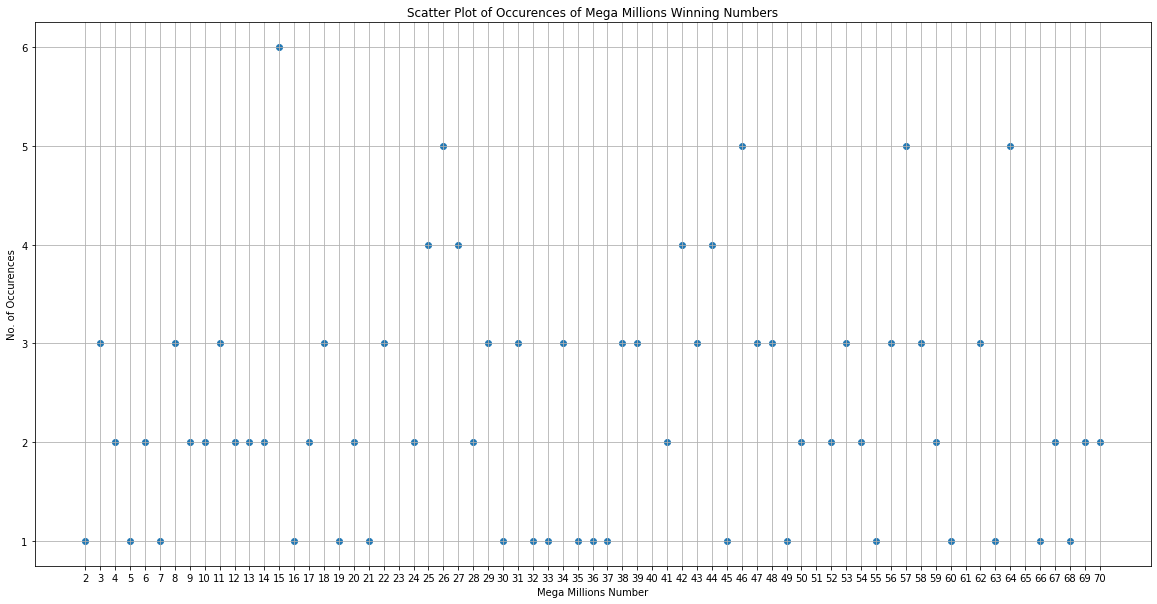

In [10]:
#unpack the list ofr x and y values using zip(data)
x, y = zip(*sorted_d)
#plot the # vs the number of occurces
# x=list(range(1, 71))
fig = plt.figure(figsize = (20, 10))
plt.scatter(*zip(*sorted_d))
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
# plt.xticks(rotation=70)

plt.xlabel("Mega Millions Number") 
plt.ylabel("No. of Occurences") 
plt.title("Scatter Plot of Occurences of Mega Millions Winning Numbers") 
plt.grid()
 # Call save fig beforee plt.show 
plt.savefig("Images/MegaMillions_Scatter.png", bbox_inches='tight')
plt.show()

## Frequency

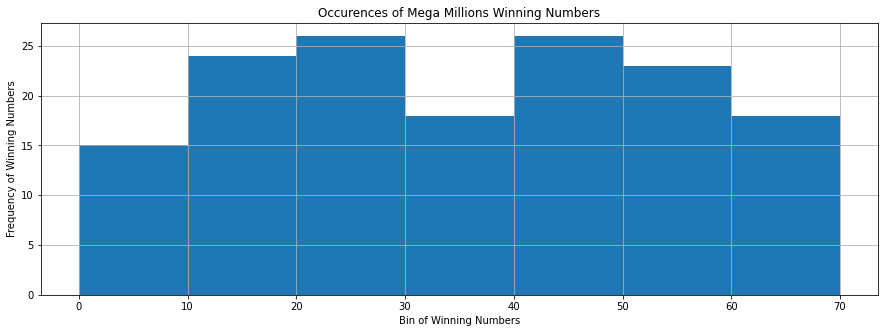

In [11]:
# Frequency
fig = plt.figure(figsize = (15, 5))
plt.hist(lst, bins=[0,10,20,30,40,50,60,70])  
plt.xlabel("Bin of Winning Numbers") 
plt.ylabel("Frequency of Winning Numbers") 
plt.title("Occurences of Mega Millions Winning Numbers")
plt.grid()
plt.savefig("Images/MegaMillions_BinFrequency.png", bbox_inches='tight')

## Probability

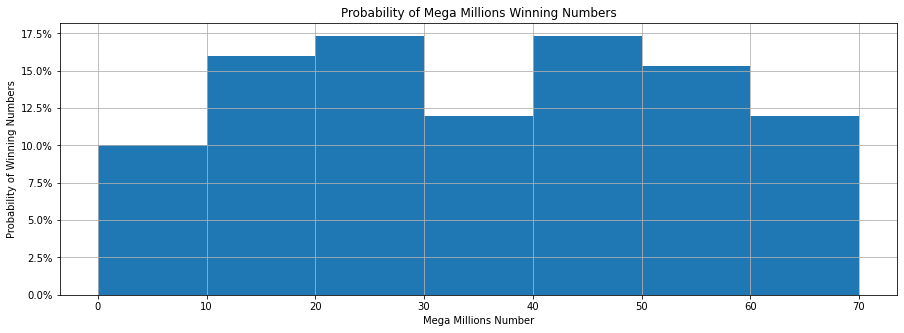

In [12]:
#Probablility
#The probability of the sum of bars adds up to .1 or 100%
fig = plt.figure(figsize = (15, 5))
plt.hist(lst, bins=[0,10,20,30,40,50,60,70], density=True )    #density=True to convert to probablilities
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(.1))
plt.xlabel("Mega Millions Number") 
plt.ylabel("Probability of Winning Numbers") 
plt.title("Probability of Mega Millions Winning Numbers")
plt.grid()
plt.savefig("Images/MegaMillionsBinProbability.png", bbox_inches='tight')

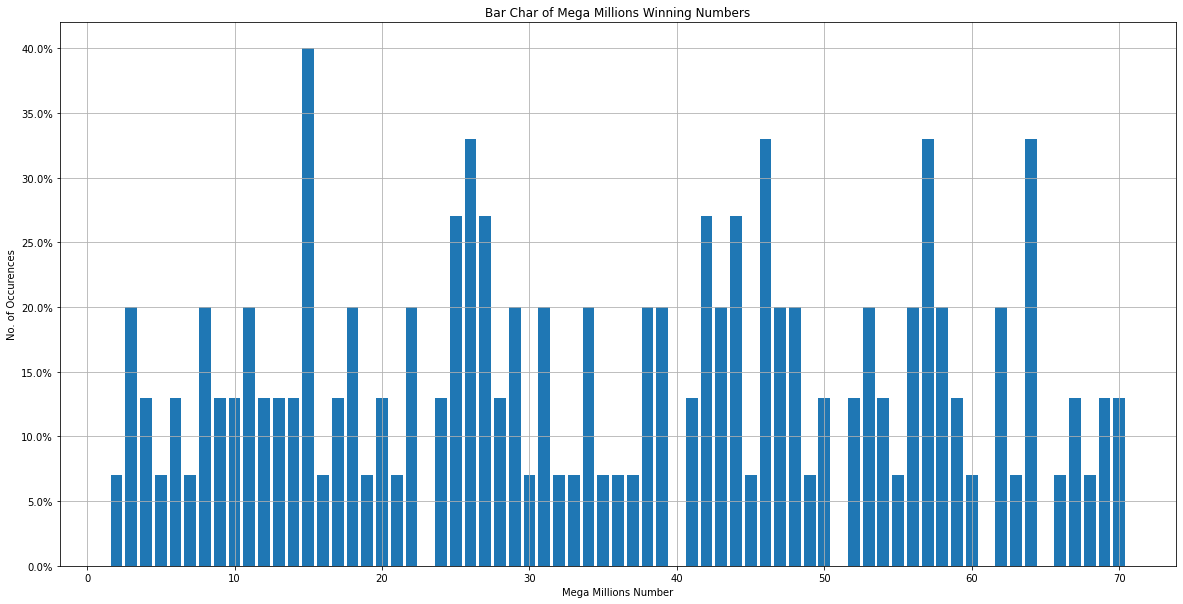

In [13]:
def frequencies(values):
    frequencies = {}
    for v in values:
        if v in frequencies:
            frequencies[v] += 1
        else:
            frequencies[v] = 1
    return frequencies
def probabilities(sample, freqs):
    probs = []
    for k,v in freqs.items():
        probs.append(round(v/len(sample),3))
    return probs
sample = lst                                    #lst is the list of numbers that are sorted
freqs = frequencies(sample)                     # frequency is how often the number occurs
probs = probabilities(sample, freqs)            #probabilility appends (#/length of the sample) to three decimal
x_axis = list(set(sample))                      # x_axis just counts the numbers from 1 to 70
fig = plt.figure(figsize = (20, 10))
plt.bar(x_axis, probs)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(.1))
plt.xlabel("Mega Millions Number") 
plt.ylabel("No. of Occurences") 
plt.title("Bar Char of Mega Millions Winning Numbers") 
plt.grid()
plt.savefig("Images/MegaMillionsProbabilityBar.png", bbox_inches='tight')
plt.show()

### Bins and Quartiles

In [14]:
#Equal amount of observations in each of the 4 quartiles
# lst = pd.qcut(df['ext price'], q=4) #save it back in the original df
Qcuts=pd.qcut(lst, q=4)
Qcuts.value_counts()

(1.999, 18.25]    38
(18.25, 35.5]     37
(35.5, 52.0]      38
(52.0, 70.0]      37
dtype: int64

In [15]:
#Define number of bins
pd.cut(lst, bins=4).value_counts()

(1.932, 19.0]    39
(19.0, 36.0]     37
(36.0, 53.0]     40
(53.0, 70.0]     34
dtype: int64

In [16]:
##linespace to provide an array of evenly spaced bins over a specified range
# pd.cut(lst, bins=np.linspace(0, 70, 8))
##Defining bin bounaries
cut_bins = [0, 10, 20, 30, 40,50,60,70]
Cut_lst = pd.cut(lst, bins=cut_bins)

In [17]:
#Use interval range for ranges
interval_range = pd.interval_range(start=0, freq=10, end=70)
lst_interval = pd.cut(lst, bins=interval_range, labels=[1,2,3])
lst_interval

[(0, 10], (0, 10], (0, 10], (0, 10], (0, 10], ..., (60, 70], (60, 70], (60, 70], (60, 70], (60, 70]]
Length: 150
Categories (7, interval[int64]): [(0, 10] < (10, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70]]

## Pick Random Numbers

In [44]:
# Create a list of random numbers that could be choosen.
lotteryNumbers = []

# Generage Random Numbers
for i in range (0,5):
  #generate a set of random numbers
    number = random.randint(10,60)
  #Check if this number has already been picked
    while number in lotteryNumbers:
  # if it has, pick a new number instead 
        number = random.randint(10,60)
 #Now that we have a unique number, let's append it to our list.
    lotteryNumbers.append(number)

#Sort the list in ascending order
lotteryNumbers.sort()

#Display the list on screen:
print("Today's lottery numbers are: ") 
print(lotteryNumbers)

Today's lottery numbers are: 
[25, 39, 49, 58, 60]


## Pick Numbers From A List

In [43]:
# Create a list of random numbers that could be choosen.
lotteryNumbers = []

# Generage Random Numbers From Lucky Numbers List
for i in range (0,5):
  #generate a set of random numbers
    number = random.choice(lucky_Numbers)
  #Check if this number has already been picked
    while number in lotteryNumbers:
  # if it has, pick a new number instead 
        number = random.choice(lucky_Numbers)
 #Now that we have a unique number, let's append it to our list.
    lotteryNumbers.append(number)    

#Sort the list in ascending order
lotteryNumbers.sort()

#Display the list on screen:
print("Today's lottery numbers are: ") 
print(lotteryNumbers)

Today's lottery numbers are: 
[21, 33, 49, 52, 66]


# Gold Number

In [19]:
gold=[1, 22, 10, 12, 25,13,17,25,19,16,12,11,22,13,21,25,22,1,12,14,23,13,9,3,20,23,19,17,15,21,22,22,18,24,11,15,7,6,2,22,22,8,3,4,18,9,25,5,4,14,14,17,18]
#gold_list is 30 samples of winning numbers
gold_list=gold[0:30]
#create a dictionary and count occurances in gold_list
g={}
[ g.update( {i:g.get(i, 0)+1} ) for i in gold_list ]
#sort the list
sorted_g=sorted(g.items())

gold_list.sort()
def find_missing(gold_list): 
    return [x for x in range(gold_list[0], gold_list[-1]+1)  if x not in gold_list]
print(find_missing(gold_list))

###Finding numbers that are repeated exactly twice 
##there is an initial assumption that numbers repeated only twice are more likely to be called again than any other repetition
repeats = [
    item 
    for item, count in collections.Counter(gold_list).items() 
    if count == 2
]
print(repeats)

[2, 4, 5, 6, 7, 8, 18, 24]
[1, 17, 19, 21, 23]


## Statistics

In [20]:
print('Standard Deviation')
stdevg = st.pstdev(gold_list)
print(stdevg)
print('Variance')
varianceg = st.pvariance(gold_list)
print(varianceg)

Standard Deviation
6.691952048709123
Variance
44.782222222222224


## Bins and Quartiles

In [21]:
#Quartiles
Qcutsg=pd.qcut(gold_list, q=4)
Qcutsg.value_counts()

(0.999, 12.0]    9
(12.0, 16.5]     6
(16.5, 21.75]    7
(21.75, 25.0]    8
dtype: int64

In [22]:
#Define Number of Bins
pd.cut(gold_list, bins=4).value_counts()

(0.976, 7.0]     3
(7.0, 13.0]      9
(13.0, 19.0]     7
(19.0, 25.0]    11
dtype: int64

In [23]:
cut_binsg = [0, 5,10,15,20,25]
Cut_lstg = pd.cut(gold_list, bins=cut_bins)
Cut_lstg

[(0, 10], (0, 10], (0, 10], (0, 10], (0, 10], ..., (20, 30], (20, 30], (20, 30], (20, 30], (20, 30]]
Length: 30
Categories (7, interval[int64]): [(0, 10] < (10, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70]]

In [24]:
#linespace to provide an array of evenly spaced bins over a specified range
binz=pd.cut(gold_list, bins=np.linspace(0, 25, 6))
binz

[(0.0, 5.0], (0.0, 5.0], (0.0, 5.0], (5.0, 10.0], (5.0, 10.0], ..., (20.0, 25.0], (20.0, 25.0], (20.0, 25.0], (20.0, 25.0], (20.0, 25.0]]
Length: 30
Categories (5, interval[float64]): [(0.0, 5.0] < (5.0, 10.0] < (10.0, 15.0] < (15.0, 20.0] < (20.0, 25.0]]

In [25]:
#use interval range for numbers and date ranges but cannot label bins
interval_range = pd.interval_range(start=0, freq=5, end=25)
lst_interval = pd.cut(gold_list, bins=interval_range, labels=[1,2,3])
lst_interval

[(0, 5], (0, 5], (0, 5], (5, 10], (5, 10], ..., (20, 25], (20, 25], (20, 25], (20, 25], (20, 25]]
Length: 30
Categories (5, interval[int64]): [(0, 5] < (5, 10] < (10, 15] < (15, 20] < (20, 25]]

## Visualizing Gold Winning Numbers

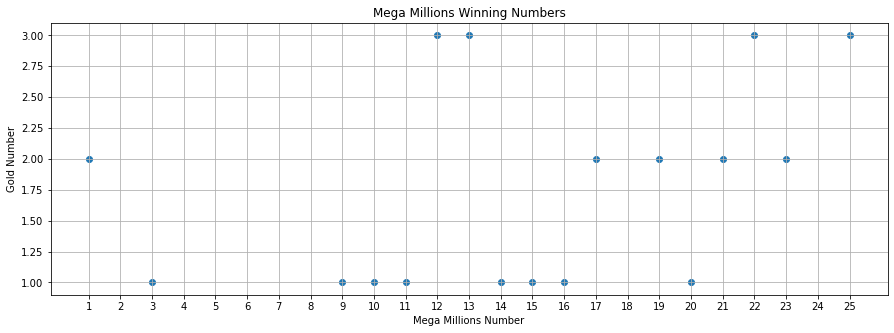

<Figure size 432x288 with 0 Axes>

In [26]:
#unpack the list ofr x and y values using zip(data)
x, y = zip(*sorted_g)
#plot the # vs the number of occurces
fig = plt.figure(figsize = (15, 5))
plt.scatter(*zip(*sorted_g))
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
# plt.yticks(0,5)
# plt.xticks(rotation=70)

plt.xlabel("Mega Millions Number") 
plt.ylabel("Gold Number") 
plt.title("Mega Millions Winning Numbers") 
plt.grid()
plt.show() 
plt.savefig("MegaMillionsGold.png", bbox_inches='tight')
plt.savefig("Images/GoldScatter.png", bbox_inches='tight')
plt.show()

## Frequency

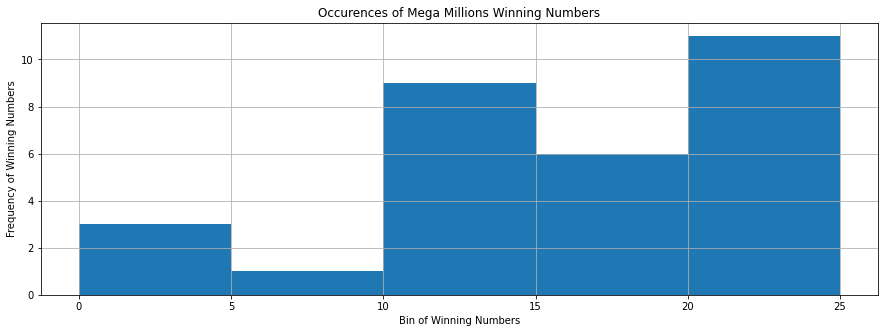

In [27]:
#frequency
fig = plt.figure(figsize = (15, 5))
plt.hist(gold_list, bins=[0, 5, 10, 15, 20, 25])
plt.xlabel("Bin of Winning Numbers") 
plt.ylabel("Frequency of Winning Numbers") 
plt.title("Occurences of Mega Millions Winning Numbers")
plt.grid()
plt.savefig("Images/GoldBinFrequency.png", bbox_inches='tight')
plt.show()

## Probability

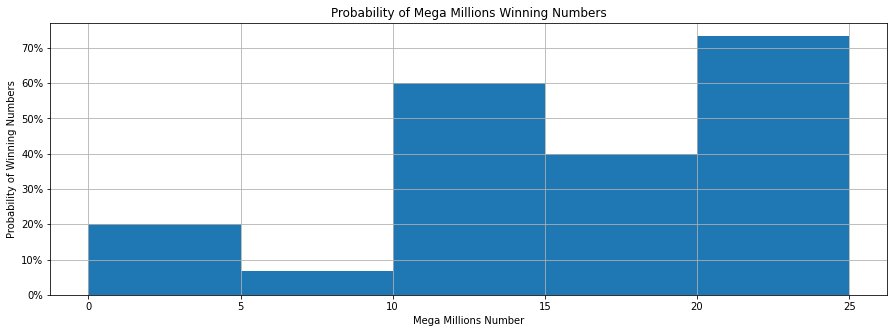

In [28]:
#Probability
#The probability adds up to 100% because we have to multiply the probability of each of the bins by 5
fig = plt.figure(figsize = (15, 5))
plt.hist(gold_list, bins=[0, 5, 10, 15, 20, 25], density=True)          #density=True to get probability
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(.1))
plt.xlabel("Mega Millions Number") 
plt.ylabel("Probability of Winning Numbers") 
plt.title("Probability of Mega Millions Winning Numbers")
plt.grid()
plt.savefig("Images/GoldBinProbability.png", bbox_inches='tight')
plt.show()

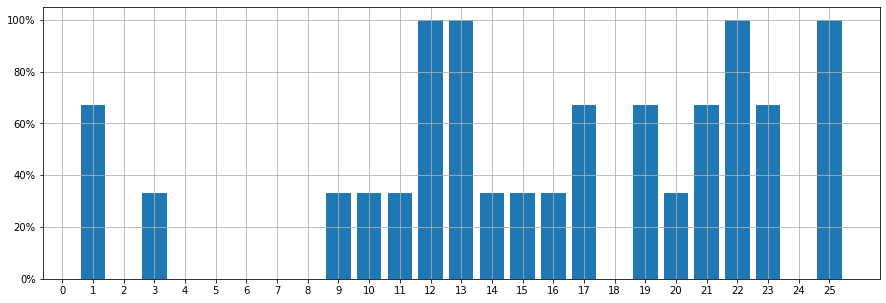

In [29]:
def frequenciesg(values):
    frequenciesg = {}
    for v in values:
        if v in frequenciesg:
            frequenciesg[v] += 1
        else:
            frequenciesg[v] = 1
    return frequenciesg
def probabilitiesg(samp, freqs):
    probs = []
    for k,v in freqs.items():
        probs.append(round(v/len(samp),3))
    return probs
samp = gold_list                              #lst is the list of numbers that are sorted
freqs = frequenciesg(samp)                     # frequency is how often the number occurs
probs = probabilitiesg(samp, freqs)            #probabilility appends (#/length of the sample) to three decimal
x_axis = list(set(samp))                      # x_axis just counts the numbers from 1 to 25
fig = plt.figure(figsize = (15, 5))
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(.1))
plt.bar(x_axis, probs)
plt.xticks(np.arange(0, 26, 1.0))
plt.grid()
plt.savefig("Images/GoldBar.png", bbox_inches='tight')
plt.show()

In [50]:
def find_missing(gold_list): 
    return [x for x in range(gold_list[0], gold_list[-1]+1)  if x not in gold_list]
print("Numbers have not been choosen")
print(find_missing(gold_list))

repeats = [
    item 
    for item, count in collections.Counter(gold_list).items() 
    if count >= 2]
print("Numbers that have been choosen twice")
print(repeats)


Numbers have not been choosen
[2, 4, 5, 6, 7, 8, 18, 24]
Numbers that have been choosen twice
[1, 12, 13, 17, 19, 21, 22, 23, 25]


## Pick Random Numbers

In [30]:


# Create a list of random numbers that could be choosen.
GoldNumbers = []

for i in range (1):
    number = random.randint(10,25)
  #Check if this number has already been picked and ...
    while number in GoldNumbers:
    # ... if it has, pick a new number instead 
        number = random.randint(10,25)
  
  #Now that we have a unique number, let's append it to our list.
    GoldNumbers.append(number)

#Sort the list in ascending order
GoldNumbers.sort()

#Display the list on screen:
print("Today's lottery numbers are:") 
print(GoldNumbers)

Today's lottery numbers are:
[25]


## Pick Numbers From A List

In [45]:
once=[
    item
    for item,  count in collections.Counter(lst).items()
    if count == 1]


print("Numbers that have been choosen only once")
print(once)
print("Numbers that have been choosen only twice")
print(repeats)

lucky_Numbers=once+repeats
lucky_Numbers.sort()
print('Lucky Numbers')
lucky_Numbers

Numbers that have been choosen only once
[2, 5, 7, 16, 19, 21, 30, 32, 33, 35, 36, 37, 45, 49, 55, 60, 63, 66, 68]
Numbers that have been choosen only twice
[4, 6, 9, 10, 12, 13, 14, 17, 20, 24, 28, 41, 50, 52, 54, 59, 67, 69, 70]
Lucky Numbers


[2,
 4,
 5,
 6,
 7,
 9,
 10,
 12,
 13,
 14,
 16,
 17,
 19,
 20,
 21,
 24,
 28,
 30,
 32,
 33,
 35,
 36,
 37,
 41,
 45,
 49,
 50,
 52,
 54,
 55,
 59,
 60,
 63,
 66,
 67,
 68,
 69,
 70]

# Chi Squared

ValueError: operands could not be broadcast together with shapes (30,) (3,) 

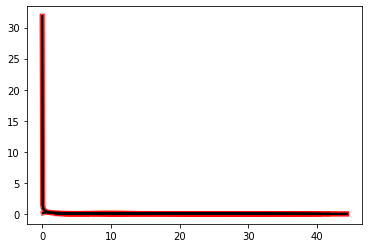

In [31]:
fig, ax = plt.subplots(1, 1)
df_chi=gold_list

mean, var, skew, kurt = chi2.stats(df_chi, moments='mvsk')
x = np.linspace(chi2.ppf(0.01, df_chi),                           #probability density function (pdf):
                chi2.ppf(0.99, df_chi), 100)
ax.plot(x, chi2.pdf(x, df_chi),
       'r-', lw=5, alpha=0.6, label='chi2 pdf')

rv = chi2(df_chi)                                                 #Alt method:call distribution object(as a function) 
#Freeze the distribution and display the frozen pdf:                #to fix the shape, location and scale parameters
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')                #This returns a “frozen” RV object holding the given parameters fixed

vals = chi2.ppf([0.001, 0.5, 0.999], df_chi)                      #Check accuracy of cdf and ppf:
np.allclose([0.001, 0.5, 0.999], chi2.cdf(vals, df_chi))          #Check accuracy of cdf and ppf:

r = chi2.rvs(df_chi, size=1000)                                   #Generate random numbers:
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)           #And compare the histogram:
ax.legend(loc='best', frameon=False)
plt.show()


In [ ]:
gold_list_chi = chi2.gold_list 
[a] = [0.6, ] * gold_list_chi 
rv = chi2(a) 
print ("RV : \n", rv) 

In [ ]:
quantile = np.arange (0.01, 1, 0.1)    
# Random Variates 
R = chi2.rvs(a, scale = 2,  size = 10) 
print ("Random Variates : \n", R) 
  
# PDF 
R = chi2.pdf(a, quantile, loc = 0, scale = 1) 
print ("\nProbability Distribution : \n", R)

In [ ]:
distribution = np.linspace(0, np.minimum(rv.dist.b, 5)) 
print("Distribution : \n", distribution) 
plot = plt.plot(distribution, rv.pdf(distribution)) 

In [ ]:
x = np.linspace(0, 5, 100)  
# Varying positional arguments 
y1 = chi2.pdf(x, 1, 6) 
y2 = chi2.pdf(x, 1, 4) 
plt.plot(x, y1, "*", x, y2, "r--") 